In [29]:
using Plots
include("TuningCurvePortal.jl");
#plotlyjs()

In [26]:
pyplot()

Plots.PyPlotBackend()

In [13]:
target_name = "ts6_SC_180401_GBL"
(spike_trains, marker, stim_info) = TuningCurvePortal.getTargetData(target_name)
spike_trains

15-element Array{Tuple{String,Array{Float64,2}},1}:
 ("WBC15a", [6.38363; 7.29983; … ; 1650.94; 1659.76])  
 ("WBC11a", [0.134333; 5.65117; … ; 1625.41; 1625.95]) 
 ("WBC07a", [0.316267; 0.321533; … ; 1659.89; 1659.93])
 ("WBC12a", [5.64417; 5.76253; … ; 1630.62; 1636.53])  
 ("WBC07b", [0.325633; 0.331933; … ; 1659.68; 1659.69])
 ("WBC08a", [5.584; 5.58803; … ; 1630.62; 1651.78])    
 ("WBC05a", [5.86547; 6.35653; … ; 1574.83; 1579.34])  
 ("WBC06a", [6.38377; 7.29973; … ; 1630.62; 1632.38])  
 ("WBC14b", [5.57103; 5.5789; … ; 1625.56; 1625.94])   
 ("WBC13a", [5.56603; 6.37503; … ; 1630.62; 1653.79])  
 ("WBC10a", [5.48913; 5.6109; … ; 1644.66; 1654.65])   
 ("WBC02a", [4.11153; 6.0365; … ; 1630.62; 1652.65])   
 ("WBC16a", [5.57673; 5.5833; … ; 1630.4; 1630.62])    
 ("WBC03a", [5.55333; 5.57923; … ; 1625.67; 1630.62])  
 ("WBC14a", [2.4161; 5.62877; … ; 1625.71; 1630.62])   

## Linear Filter
$$ r_{\mathrm{approx}}(t) = \sum_{i=1}^N w(t-t_i) $$

we are using guassian kernel, with $\sigma_w = 0.6$.

$$ w(\tau) = \frac{1}{\sigma_w \sqrt{2 \pi}} \exp(- \frac{\tau^2}{2 \sigma_w^2}) $$


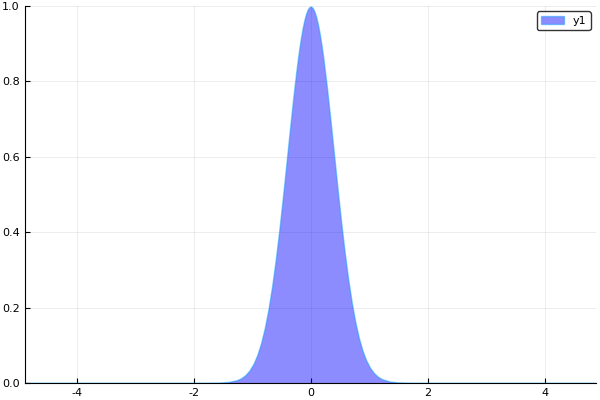

In [31]:
function kernel_w(t)
    sigma_w = 0.4
    exp.(- t.*t / (2 * sigma_w * sigma_w)) / (sqrt(2 * pi) * sigma_w)
end
plot(kernel_w, fill=(0,:blue), ylim=(0,1), alpha=0.45)

### linear filter demo


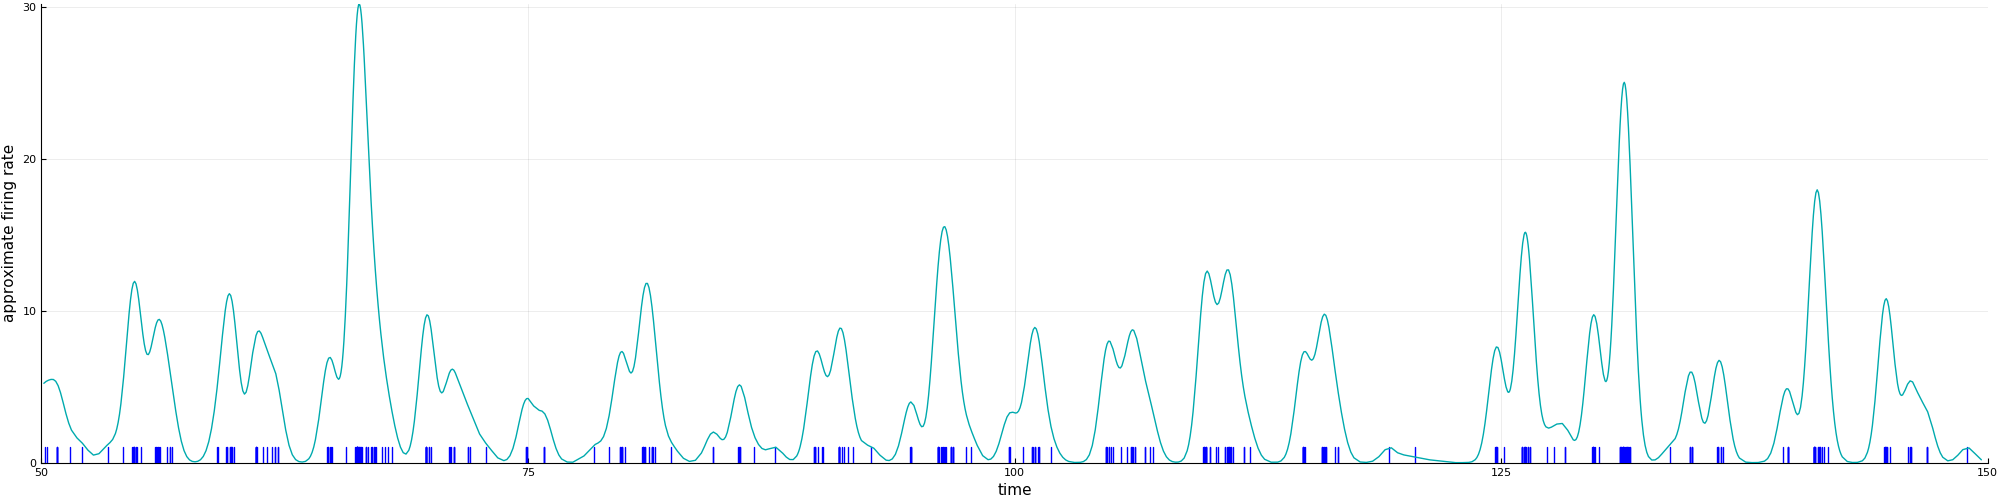

In [33]:
xroi = (50,150)
demo_train = spike_trains[3]
demo_train_filter = t -> sum(kernel_w(t - demo_train[2]))
TuningCurvePortal.plotSpikeTrain([demo_train], xrange=xroi)
plot!(demo_train_filter, xroi[1], xroi[2], 
    ylabel="approximate firing rate", xlabel="time", 
    size=(2000,500))

---
## Trim into trials

set ROI as [-1,5]

In [14]:
demo_tcurve = [(name, 
        TuningCurvePortal.trimIntoAverageFiringRate(train, marker, stim_info))
        for (name, train) in spike_trains]

15-element Array{Tuple{String,Array{Any,1}},1}:
 ("WBC15a", Any[("B1", TuningCurvePortal.#17), ("B2", TuningCurvePortal.#17), ("B3", TuningCurvePortal.#17), ("B4", TuningCurvePortal.#17), ("B5", TuningCurvePortal.#17), ("B6", TuningCurvePortal.#17), ("B7", TuningCurvePortal.#17), ("B8", TuningCurvePortal.#17), ("G1", TuningCurvePortal.#17), ("G2", TuningCurvePortal.#17)  …  ("L7#7", TuningCurvePortal.#17), ("L7#8", TuningCurvePortal.#17), ("L8#1", TuningCurvePortal.#17), ("L8#2", TuningCurvePortal.#17), ("L8#3", TuningCurvePortal.#17), ("L8#4", TuningCurvePortal.#17), ("L8#5", TuningCurvePortal.#17), ("L8#6", TuningCurvePortal.#17), ("L8#7", TuningCurvePortal.#17), ("L8#8", TuningCurvePortal.#17)])
 ("WBC11a", Any[("B1", TuningCurvePortal.#17), ("B2", TuningCurvePortal.#17), ("B3", TuningCurvePortal.#17), ("B4", TuningCurvePortal.#17), ("B5", TuningCurvePortal.#17), ("B6", TuningCurvePortal.#17), ("B7", TuningCurvePortal.#17), ("B8", TuningCurvePortal.#17), ("G1", TuningCurvePortal.#17

# Direct Neural Trajectory

In [5]:
WBC08a = spike_trains[3]
WBC14b = spike_trains[7]
WBC15a = spike_trains[1]

("WBC15a", [2.64157; 4.29597; … ; 362.542; 364.439])

In [127]:
#unit_response = TuningCurvePortal.trimIntoAverageFiringRate(demo_train[2], marker, stim_info)
#unit_tuningcurve = TuningCurvePortal.getTuningCurve(unit_response)

demo_tcurve = [(name, 
        TuningCurvePortal.trimIntoAverageFiringRate(train, marker, stim_info))
        for (name, train) in [WBC08a, WBC14b, WBC15a]]


3-element Array{Tuple{String,Array{Any,1}},1}:
 ("WBC08a", Any[("B1", TuningCurvePortal.#17), ("B2", TuningCurvePortal.#17), ("B3", TuningCurvePortal.#17), ("B4", TuningCurvePortal.#17), ("B5", TuningCurvePortal.#17), ("B6", TuningCurvePortal.#17), ("B7", TuningCurvePortal.#17), ("B8", TuningCurvePortal.#17), ("G1", TuningCurvePortal.#17), ("G2", TuningCurvePortal.#17), ("G3", TuningCurvePortal.#17), ("G4", TuningCurvePortal.#17), ("G5", TuningCurvePortal.#17), ("G6", TuningCurvePortal.#17), ("G7", TuningCurvePortal.#17), ("G8", TuningCurvePortal.#17)])
 ("WBC14b", Any[("B1", TuningCurvePortal.#17), ("B2", TuningCurvePortal.#17), ("B3", TuningCurvePortal.#17), ("B4", TuningCurvePortal.#17), ("B5", TuningCurvePortal.#17), ("B6", TuningCurvePortal.#17), ("B7", TuningCurvePortal.#17), ("B8", TuningCurvePortal.#17), ("G1", TuningCurvePortal.#17), ("G2", TuningCurvePortal.#17), ("G3", TuningCurvePortal.#17), ("G4", TuningCurvePortal.#17), ("G5", TuningCurvePortal.#17), ("G6", TuningCurvePor

In [27]:
demo_tcurve[1][2][1][2](-1)

0.3206703928293672

In [128]:
plot3d(demo_tcurve[1][2][1][2], demo_tcurve[3][2][1][2],demo_tcurve[2][2][1][2], -1, 5, 
    label="B1")
plot3d!(demo_tcurve[1][2][3][2], demo_tcurve[3][2][3][2],demo_tcurve[2][2][3][2], -1, 5, 
    label="B3")
plot3d!(demo_tcurve[1][2][5][2], demo_tcurve[3][2][5][2],demo_tcurve[2][2][5][2], -1, 5, 
    label="B5")
plot3d!(demo_tcurve[1][2][8][2], demo_tcurve[3][2][8][2],demo_tcurve[2][2][8][2], -1, 5, 
    label="B8")
plot3d!(xlabel="WBC08a", ylabel="WBC15a", zlabel="WBC14a", title="Blue")

In [129]:
plot3d(demo_tcurve[1][2][9][2], demo_tcurve[3][2][9][2],demo_tcurve[2][2][9][2], -1, 5, 
    label="G1")
plot3d!(demo_tcurve[1][2][11][2], demo_tcurve[3][2][11][2],demo_tcurve[2][2][11][2], -1, 5, 
    label="G3")
plot3d!(demo_tcurve[1][2][13][2], demo_tcurve[3][2][13][2],demo_tcurve[2][2][13][2], -1, 5, 
    label="G5")
plot3d!(demo_tcurve[1][2][16][2], demo_tcurve[3][2][16][2],demo_tcurve[2][2][16][2], -1, 5, 
    label="G8")
plot3d!(xlabel="WBC08a", ylabel="WBC15a", zlabel="WBC14a", title="Green")

In [130]:
plot3d(demo_tcurve[1][2][1][2], demo_tcurve[3][2][1][2],demo_tcurve[2][2][1][2], -1, 5, 
    label="B1", color=:blue)
plot3d!(demo_tcurve[1][2][3][2], demo_tcurve[3][2][3][2],demo_tcurve[2][2][3][2], -1, 5, 
    label="B3", color=:blue)
plot3d!(demo_tcurve[1][2][5][2], demo_tcurve[3][2][5][2],demo_tcurve[2][2][5][2], -1, 5, 
    label="B5", color=:blue)
plot3d!(demo_tcurve[1][2][8][2], demo_tcurve[3][2][8][2],demo_tcurve[2][2][8][2], -1, 5, 
    label="B8", color=:blue)

plot3d!(demo_tcurve[1][2][9][2], demo_tcurve[3][2][9][2],demo_tcurve[2][2][9][2], -1, 5, 
    label="G1", color=:green)
plot3d!(demo_tcurve[1][2][11][2], demo_tcurve[3][2][11][2],demo_tcurve[2][2][11][2], -1, 5, 
    label="G3", color=:green)
plot3d!(demo_tcurve[1][2][13][2], demo_tcurve[3][2][13][2],demo_tcurve[2][2][13][2], -1, 5, 
    label="G5", color=:green)
plot3d!(demo_tcurve[1][2][16][2], demo_tcurve[3][2][16][2],demo_tcurve[2][2][16][2], -1, 5, 
    label="G8", color=:green)

plot3d!(xlabel="WBC08a", ylabel="WBC15a", zlabel="WBC14a", title="Blue and Green", legend=false)


# Neural Trajectroy with PCA

In [17]:
using MultivariateStats

function getDataSet(tcurve, pos=1)
    demo_dataset = zeros(15,1)
    for idx = -1:0.01:5
        temp = [ item[pos][2](idx) for item in tcurve]
        demo_dataset = hcat(demo_dataset, temp)
    end
    demo_dataset
end

getDataSet (generic function with 2 methods)

In [22]:
demo_tcurve = [(name, 
        TuningCurvePortal.trimIntoAverageFiringRate(train, marker, stim_info))
        for (name, train) in spike_trains]

demo_tc = [funcs for (name, funcs) in demo_tcurve]
demo_data = [getDataSet(demo_tc, idx) for idx=1:16]
demo_PCA = [fit(PCA, item',maxoutdim=3).proj for item in demo_data]
[name for (name, funcs) in demo_tcurve]

15-element Array{String,1}:
 "WBC15a"
 "WBC11a"
 "WBC07a"
 "WBC12a"
 "WBC07b"
 "WBC08a"
 "WBC05a"
 "WBC06a"
 "WBC14b"
 "WBC13a"
 "WBC10a"
 "WBC02a"
 "WBC16a"
 "WBC03a"
 "WBC14a"

In [23]:
plot3d()
i=1
for item in demo_PCA[1:7]
    plot3d!(item[:,1], item[:,2], item[:,3], label="B"*string(i))
    i+=1
end
plot3d!(title="blue", xlabel="PC1",ylabel="PC2",zlabel="PC3")

LoadError: [91mBoundsError: attempt to access 602×2 Array{Float64,2} at index [Base.Slice(Base.OneTo(602)), 3][39m

In [12]:
plot3d()
i=1
for item in demo_PCA[1:7]
    plot3d!(item[:,1], item[:,2], item[:,3], label="G"*string(i))
    i+=1
end
plot3d!(title="Green", xlabel="PC1",ylabel="PC2",zlabel="PC3")

In [11]:
plot3d()
i=1
for item in demo_PCA[1:7]
    plot3d!(item[:,1], item[:,2], item[:,3], label="B"*string(i), color=:blue)
    i+=1
end
i=1
for item in demo_PCA[9:15]
    plot3d!(item[:,1], item[:,2], item[:,3], label="G"*string(i), color=:green)
    i+=1
end
plot3d!(title="green and blue", xlabel="PC1",ylabel="PC2",zlabel="PC3")

In [14]:
plot()
i=1
for item in demo_PCA[1:7]
    plot!(item[:,1], item[:,2], label="B"*string(i))
    i+=1
    
end
plot!(title="blue", xlabel="PC1",ylabel="PC2")

In [9]:
plot()
i=1
for item in demo_PCA[9:15]
    plot!(item[:,1], item[:,2], label="G"*string(i))
    i+=1
end
plot!(title="green", xlabel="PC1",ylabel="PC2")

In [7]:
plot()
i=1
for item in demo_PCA[1:7]
    plot!(item[:,1], item[:,2], label="B"*string(i), color=:blue)
    i+=1
end
i=1
for item in demo_PCA[9:15]
    plot!(item[:,1], item[:,2], label="G"*string(i), color=:green)
    i+=1
end
plot3d!(title="green and blue", xlabel="PC1",ylabel="PC2")

## NOTE:
- color combination
- B7 and G1 anomaly
    - 